# Alcohol Heat Map

## Dependencies Set-up

In [23]:
# Dependencies
from vis1_cnfg import gkey
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
import json
import matplotlib.pyplot as plt
#from scipy.stats import linregress
from scipy import stats

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

## Data Retrieval

In [2]:
# Import the original data we analyzed earlier. Use dtype="object" to match other
df_alchy = pd.read_csv("../data/clean_data/alcohol_ay_avg.csv")
df_alchy.head()

,Country Code,Country,Average Alcohol
0,AF,Afghanistan,0.031667
1,AL,Albania,5.188571
2,DZ,Algeria,0.505714
3,AO,Angola,7.291429
4,AR,Argentina,8.193333


In [3]:
df_happiness_complete = pd.read_csv("../data/clean_data/vis1_happinesscomplete.csv")
df_happiness_complete.head()

,Country,Country Code,Latitude,Longitude,Happiness
0,Afghanistan,AF,33.939110,67.709953,3.897008
1,Albania,AL,41.153332,20.168331,5.018378
2,Algeria,DZ,28.033886,1.659626,5.616222
3,Angola,AO,-11.202692,17.873887,4.420299
4,Argentina,AR,-38.416097,-63.616672,6.580427


In [4]:
#merge happiness_complete (161 rows) with happiness_df (153 rows)

df_merged = pd.merge(
    df_happiness_complete, df_alchy, how="inner", on=["Country Code", "Country Code"])

#happiness_complete = [happiness_complete.iloc[:,0:5]]

df_merged #has 153 rows after fixing Namibia problem

df_merged.rename(columns={'Country_x': 'Country'}, inplace=True)
df_merged.rename(columns={'Average Alcohol': 'Alcohol'}, inplace=True)

del df_merged['Country_y']
df_merged.head()


,Country,Country Code,Latitude,Longitude,Happiness,Alcohol
0,Afghanistan,AF,33.939110,67.709953,3.897008,0.031667
1,Albania,AL,41.153332,20.168331,5.018378,5.188571
2,Algeria,DZ,28.033886,1.659626,5.616222,0.505714
3,Angola,AO,-11.202692,17.873887,4.420299,7.291429
4,Argentina,AR,-38.416097,-63.616672,6.580427,8.193333


In [5]:
# Output File (CSV)
output_data_file2 = "output/vis2_happinessalchymerge.csv"
#export file to look at in excel
df_merged.to_csv(output_data_file2, encoding="utf-8", index=False)

In [6]:
# Store 'Lat' and 'Lng' into  locations 
locations = df_merged[["Latitude", "Longitude"]].astype(float)

# Store alcohol
alcohol = df_merged["Alcohol"].astype(float)
locations
alcohol

0       0.031667
1       5.188571
2       0.505714
3       7.291429
4       8.193333
5       3.918571
6       9.951429
7      11.883333
8       1.577143
9       2.065714
10      0.010000
11     12.470000
12     10.293333
13      6.243333
14      1.471667
15      0.482500
16      3.740000
17      4.482857
18      5.525000
19      7.095714
20     11.054286
21      4.691667
22      4.160000
23      2.808571
24      6.420000
25      8.200000
26      1.673333
27      0.630000
28      7.660000
29      5.748571
         ...    
123     0.000000
124     7.202857
125     8.920000
126     0.030000
127     8.847143
128     2.675000
129     5.278571
130     7.248571
131     9.754286
132     0.358333
133     0.800000
134     6.271667
135     6.865000
136     1.526667
137     6.804286
138     1.378571
139     1.437143
140     3.622857
141     9.011667
142     7.237143
143     1.882857
144     9.852857
145     8.740000
146     8.755000
147     1.622857
148     6.207143
149     2.638571
150     0.0416

In [7]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=alcohol, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
#heat_layer.gradient = [
#'white',
#'red',
#'yellow',
#    'green'
#]
#heat_layer.opacity = .8

# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.dissipating = True
#heat_layer.max_intensity = 12000
#heat_layer.point_radius = 10

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

![Heatmap](../Images/heatmap.png)

In [8]:
# Create a list containing coordinates
coordinates = locations
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(figure_layout)

fig

# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
#round to assign buckets
import gmaps
import gmaps.datasets

alchy_round = df_merged
alchy_round.Alcohol = alchy_round.Alcohol.round()
alchy_round.head()


,Country,Country Code,Latitude,Longitude,Happiness,Alcohol
0,Afghanistan,AF,33.939110,67.709953,3.897008,0.0
1,Albania,AL,41.153332,20.168331,5.018378,5.0
2,Algeria,DZ,28.033886,1.659626,5.616222,1.0
3,Angola,AO,-11.202692,17.873887,4.420299,7.0
4,Argentina,AR,-38.416097,-63.616672,6.580427,8.0


In [10]:
#determine bins
alchy_one = alchy_round[alchy_round.Alcohol < 1] 
alchy_two = alchy_round[alchy_round.Alcohol.between(1,1.9, inclusive=True)]
alchy_three = alchy_round[alchy_round.Alcohol.between(2,2.9, inclusive=True)]
alchy_four= alchy_round[alchy_round.Alcohol.between(3,3.9, inclusive=True)]
alchy_five= alchy_round[alchy_round.Alcohol.between(4,4.9, inclusive=True)]
alchy_six= alchy_round[alchy_round.Alcohol.between(5,5.9, inclusive=True)]
alchy_seven= alchy_round[alchy_round.Alcohol.between(6,8.9, inclusive=True)]
alchy_eight= alchy_round[alchy_round.Alcohol.between(9,11.9, inclusive=True)]
alchy_nine= alchy_round[alchy_round.Alcohol.between(9,11.9, inclusive=True)]
alchy_ten= alchy_round[alchy_round.Alcohol > 11.9]


In [11]:
#set bins of lat/longs
alchy_one = alchy_one[['Latitude','Longitude']]
alchy_two = alchy_two[['Latitude','Longitude']]
alchy_three = alchy_three[['Latitude','Longitude']]
alchy_four = alchy_four[['Latitude','Longitude']]
alchy_five = alchy_five[['Latitude','Longitude']]
alchy_six = alchy_six[['Latitude','Longitude']]
alchy_seven = alchy_seven[['Latitude','Longitude']]
alchy_eight = alchy_eight[['Latitude','Longitude']]
alchy_nine = alchy_nine[['Latitude','Longitude']]
alchy_ten = alchy_ten[['Latitude','Longitude']]

#set layers for each rating bin
alchy_one_layer = gmaps.symbol_layer(alchy_one, fill_opacity=0.5, hover_text='lightest drinkers', fill_color="green", stroke_opacity=0.5, stroke_color= "green", scale =3)
#alchy_two_layer = gmaps.symbol_layer(alchy_two, fill_opacity=0.2, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.2, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_three_layer = gmaps.symbol_layer(alchy_three, fill_opacity=0.3, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.3, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_four_layer = gmaps.symbol_layer(alchy_four, fill_opacity=0.4, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.4, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_five_layer = gmaps.symbol_layer(alchy_five, fill_opacity=0.5, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.5, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_six_layer = gmaps.symbol_layer(alchy_six, fill_opacity=0.6, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.6, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_seven_layer = gmaps.symbol_layer(alchy_seven, fill_opacity=0.7, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.7, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_eight_layer = gmaps.symbol_layer(alchy_eight, fill_opacity=0.8, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.8, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_nine_layer = gmaps.symbol_layer(alchy_nine, fill_opacity=0.9, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.9, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_ten_layer = gmaps.symbol_layer(alchy_ten, fill_opacity=1, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=1, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)


#gmaps.symbol_layer(locations, hover_text='', fill_color=None, fill_opacity=1.0, stroke_color=None, stroke_opacity=1.0, scale=3, info_box_content=None, display_info_box=None)¶

#add all layers in and map
fig = gmaps.figure()
fig.add_layer(alchy_one_layer)
#fig.add_layer(alchy_two_layer)
#fig.add_layer(alchy_three_layer)
#fig.add_layer(alchy_four_layer)
#fig.add_layer(alchy_five_layer)
#fig.add_layer(alchy_six_layer)
#fig.add_layer(alchy_seven_layer)
#fig.add_layer(alchy_eight_layer)
#fig.add_layer(alchy_nine_layer)
#fig.add_layer(alchy_ten_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#set bins of lat/longs
alchy_one = alchy_one[['Latitude','Longitude']]
alchy_two = alchy_two[['Latitude','Longitude']]
alchy_three = alchy_three[['Latitude','Longitude']]
alchy_four = alchy_four[['Latitude','Longitude']]
alchy_five = alchy_five[['Latitude','Longitude']]
alchy_six = alchy_six[['Latitude','Longitude']]
alchy_seven = alchy_seven[['Latitude','Longitude']]
alchy_eight = alchy_eight[['Latitude','Longitude']]
alchy_nine = alchy_nine[['Latitude','Longitude']]
alchy_ten = alchy_ten[['Latitude','Longitude']]

#set layers for each rating bin
alchy_one_layer = gmaps.symbol_layer(alchy_one, fill_opacity=0.5, hover_text='lightest drinkers', fill_color="green", stroke_opacity=0.5, stroke_color= "green", scale =3)
#alchy_two_layer = gmaps.symbol_layer(alchy_two, fill_opacity=0.2, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.2, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_three_layer = gmaps.symbol_layer(alchy_three, fill_opacity=0.3, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.3, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_four_layer = gmaps.symbol_layer(alchy_four, fill_opacity=0.4, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.4, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_five_layer = gmaps.symbol_layer(alchy_five, fill_opacity=0.5, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.5, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_six_layer = gmaps.symbol_layer(alchy_six, fill_opacity=0.6, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.6, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_seven_layer = gmaps.symbol_layer(alchy_seven, fill_opacity=0.7, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.7, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_eight_layer = gmaps.symbol_layer(alchy_eight, fill_opacity=0.8, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.8, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
#alchy_nine_layer = gmaps.symbol_layer(alchy_nine, fill_opacity=0.9, fill_color='rgba(0, 0, 0, 1)', stroke_opacity=0.9, stroke_color= 'rgba(0, 0, 0, 1)', scale =3)
alchy_ten_layer = gmaps.symbol_layer(alchy_ten, fill_opacity=1, fill_color='red', stroke_opacity=1, stroke_color= 'red', scale =3)


#gmaps.symbol_layer(locations, hover_text='', fill_color=None, fill_opacity=1.0, stroke_color=None, stroke_opacity=1.0, scale=3, info_box_content=None, display_info_box=None)¶

#add all layers in and map
fig = gmaps.figure()
fig.add_layer(alchy_one_layer)
#fig.add_layer(alchy_two_layer)
#fig.add_layer(alchy_three_layer)
#fig.add_layer(alchy_four_layer)
#fig.add_layer(alchy_five_layer)
#fig.add_layer(alchy_six_layer)
#fig.add_layer(alchy_seven_layer)
#fig.add_layer(alchy_eight_layer)
#fig.add_layer(alchy_nine_layer)
fig.add_layer(alchy_ten_layer)

fig

Figure(layout=FigureLayout(height='420px'))

![Bank Map](../Images/bank_map.png)

In [13]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(bank_layer)

fig

NameError: name 'bank_layer' is not defined

![Combined Map](../Images/final_map.png)

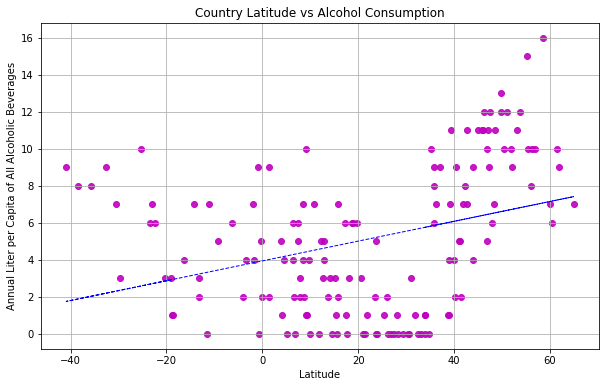

The correlation coefficient between latitude and alcohol consumption is : 0.33413631849641207
The standard error for the gradient is : 0.01227286679339339
The p-value for the null hypothesis of latitude influencing alcohol consumption is : 2.4309805817955274e-05


In [39]:
# Plotting the Data - Latitude vs. Alcohol Plot
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(
    df_merged["Latitude"], df_merged["Alcohol"])
lat_fit = lat_slope * df_merged["Latitude"] + lat_int

#fig, (ax1) = plt.subplots(1, sharex=True)
#fig.suptitle("Country Latitude vs Alcohol Consumption", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
#ax1.scatter(df_merged["Latitude"], df_merged["Alcohol"], linewidth=1)
#ax1.plot(df_merged["Latitude"], lat_fit, "b--", linewidth=1)
#ax1.set_ylabel("All Alcoholic Beverages")

plt.figure(figsize=(10,6))
plt.scatter(df_merged["Latitude"], df_merged["Alcohol"], color='m', alpha=0.9)
plt.plot(df_merged["Latitude"], lat_fit, "b--", linewidth=1)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Annual Liter per Capita of All Alcoholic Beverages')
plt.title(f'Country Latitude vs Alcohol Consumption')
plt.savefig("./output/latvalchy.png")

plt.show()
print(f"The correlation coefficient between latitude and alcohol consumption is : {lat_r}")
print(f"The standard error for the gradient is : {lat_std_err}")
print(f"The p-value for the null hypothesis of latitude influencing alcohol consumption is : {lat_p}")

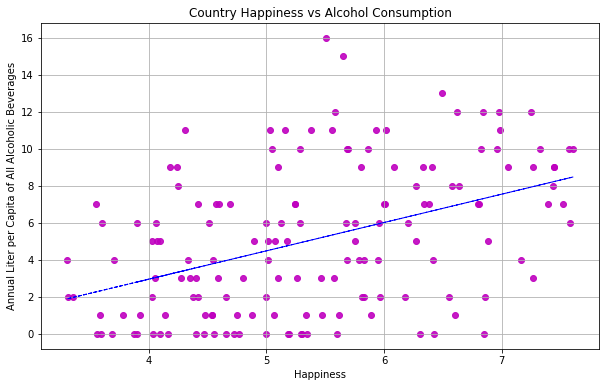

The correlation coefficient between happiness and alcohol consumption is : 0.33413631849641207
The standard error for the gradient is : 0.01227286679339339
The p-value for the null hypothesis of happiness influencing alcohol consumption is : 2.4309805817955274e-05


In [41]:
# Plotting the Data - Latitude vs. Alcohol Plot
alc_slope, alc_int, alc_r, alc_p, alc_std_err = stats.linregress(
    df_merged["Happiness"], df_merged["Alcohol"])
alc_fit = alc_slope * df_merged["Happiness"] + alc_int

plt.figure(figsize=(10,6))
plt.scatter(df_merged["Happiness"], df_merged["Alcohol"], color='m', alpha=0.9)
plt.plot(df_merged["Happiness"], alc_fit, "b--", linewidth=1)
plt.grid()
plt.xlabel('Happiness')
plt.ylabel('Annual Liter per Capita of All Alcoholic Beverages')
plt.title(f'Country Happiness vs Alcohol Consumption')
plt.savefig("./output/happyvalchy.png")
plt.show()
print(f"The correlation coefficient between happiness and alcohol consumption is : {lat_r}")
print(f"The standard error for the gradient is : {lat_std_err}")
print(f"The p-value for the null hypothesis of happiness influencing alcohol consumption is : {lat_p}")